<a href="https://colab.research.google.com/github/mohammad2682/Covid-19/blob/master/Data_Adjust(Covid_19)withDropOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import cv2
import os
from matplotlib import pyplot as plt

In [0]:
!git clone https://github.com/mohammad2682/Covid19-Dataset

Cloning into 'Covid19-Dataset'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2523 (delta 6), reused 0 (delta 0), pack-reused 2502
Receiving objects: 100% (2523/2523), 229.95 MiB | 32.80 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (4965/4965), done.


In [0]:
datadir = "Covid19-Dataset/Covid-19-Dataset/train/COVID/"
Covid=[]
for img in os.listdir(datadir):
    img_array = cv2.imread(os.path.join(datadir,img),0)
    Covid.append([img_array])

(231, 359)


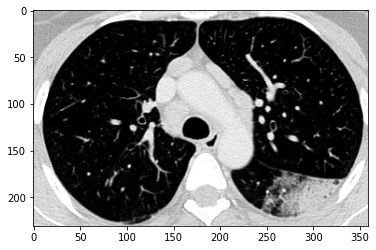

In [0]:
img=Covid[3]
img=img[0]
print(img.shape)
plt.imshow(img, cmap='gray')

In [0]:
import glob as glob
import skimage.transform as st
dl=['COVID','non-COVID']
dl=os.listdir('Covid19-Dataset/Covid-19-Dataset/train/')
xtrain=[]
p=0
for i in range(2):
  for fn in sorted(glob.glob('Covid19-Dataset/Covid-19-Dataset/train/'+dl[i]+'/*.png')):
    img = cv2.imread(fn,0)
    img=st.resize(img,(128,128))
    xtrain.append(img)

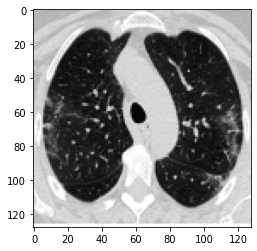

In [0]:
x = xtrain[0]
plt.imshow(x, cmap='gray')

In [0]:
dl=['COVID','non-COVID']
dl=os.listdir('Covid19-Dataset/Covid-19-Dataset/test/')
xtest=[]
p=0
for i in range(2):
  for fn in sorted(glob.glob('Covid19-Dataset/Covid-19-Dataset/test/'+dl[i]+'/*.png')):
    img = cv2.imread(fn,0)
    img=st.resize(img,(128,128))
    xtest.append(img)

In [0]:
ytrain=[]
for i in range(2):
  for j in range(1001):
    ytrain.append(i)
    
ytest=[]
for j in range(253):
  ytest.append(0)
for j in range(231):
  ytest.append(1)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization, Dropout

Using TensorFlow backend.


In [0]:
# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (7, 7), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(Dropout(0.2))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(64, (7, 7), activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4736      
_________________________________________________________________
dropout_1 (Dropout)          (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 64)        100416    
_________________________________________________________________
dropout_2 (Dropout)          (None, 55, 55, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 46656)            

In [0]:
xtrain1=np.array(xtrain)
xtest1=np.array(xtest)
ytrain1=np.array(ytrain)
ytest1=np.array(ytest)

In [0]:
ytrain1 = ytrain1.reshape((2002,1))
ytest1 = ytest1.reshape((484,1))
ytest1.shape

(484, 1)

In [0]:
bs = 32
ep = 1
classifier.fit(xtrain1, ytrain1, epochs=ep, batch_size=bs, validation_data=(xtest1, ytest1))

ValueError: ignored

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('Covid19-Dataset/Covid-19-Dataset/train',
target_size = (128, 128),
batch_size = 16,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('Covid19-Dataset/Covid-19-Dataset/test',
target_size = (128, 128),
batch_size = 32,
class_mode = 'binary')
classifier.fit_generator(training_set,
steps_per_epoch = 8000,
epochs = 1,
validation_data = test_set,
validation_steps = 2000)

Found 2000 images belonging to 2 classes.
Found 482 images belonging to 2 classes.
Epoch 1/1
8000/8000 [==============================] - 1462s 183ms/step - loss: 0.2007 - accuracy: 0.9123 - val_loss: 0.0145 - val_accuracy: 0.7531


In [0]:
from keras.preprocessing import image
test_image = image.load_img('Covid19-Dataset/Covid-19-Dataset/test/nonCOVID/Non-Covid (9).png', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)

In [0]:
if result[0][0]==1:
  print('non Covid')

non Covid


In [0]:
classifier.save('first_RUN.h5')